In [1]:
# Airline delay data subset selected instead of complete data
import numpy as np
import pandas as pd
df = pd.read_csv("airline_data.csv")

In [2]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,2006,c-11,c-22,c-3,1316,AA,FAT,DFW,1313,N
1,2004,c-10,c-12,c-2,1242,US,SAN,PHL,2369,N
2,2006,c-5,c-5,c-5,1302,OO,SBP,SFO,191,Y
3,2005,c-8,c-8,c-1,1138,DL,PHL,ATL,665,N
4,2005,c-4,c-3,c-7,1438,DL,ATL,BDL,859,N


In [4]:
#map numerical values to  categorical target and select features
d = {'Y': 1, 'N': 0}
df['dep_delayed_15min']=df['dep_delayed_15min'].map(d)

df_data=df[['Month','DayofMonth','DayOfWeek','UniqueCarrier']]

In [5]:
# vectorize features with dummy variables
from pandas import DataFrame
df_X2 = pd.get_dummies(df_data)


In [6]:
df_Y2=df['dep_delayed_15min']

In [7]:
# Export transformed data
airline_df = df_X2.join(df['dep_delayed_15min'])
airline_df.to_csv('airline_trans.csv')

In [8]:
%pylab inline
import matplotlib.pyplot as pl


Populating the interactive namespace from numpy and matplotlib


In [9]:
# import models and split the data for train and test 
import sklearn.cross_validation as cv
import numpy as np
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()

import sklearn.grid_search as gs



x_train, x_test, y_train, y_test = cv.train_test_split(df_X2, 
                                                       df_Y2, 
                                                       test_size=1.0/3, 
                                                       random_state=0)

In [10]:
# Increase the depth of the tree for the default decision tree parameter
depth  = range(1, 30)
tree_train = []
tree_test = []
for i in depth:
    tree_model.set_params(max_depth = i)
    tree_model.fit(x_train, y_train)
    train_error = 1 - tree_model.score(x_train, y_train)
    test_error = 1 - tree_model.score(x_test, y_test)
    
    tree_train.append(train_error)
    tree_test.append(test_error)

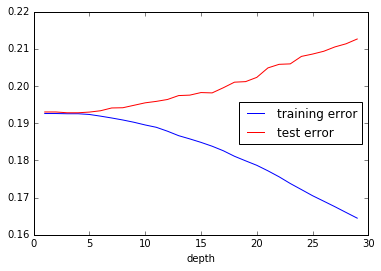

In [11]:
#Plot the effect of increasing the depth of the tree
pl.plot(depth, tree_train, c = 'blue', label='training error')
pl.plot(depth, tree_test, c = 'red', label='test error')
pl.legend(loc=7)
pl.xlabel('depth')
pl.show()

In [12]:
# Use cross validation to find the best model parameters
grid_para_tree = [{"criterion": ["gini", "entropy"], "min_samples_leaf": range(1, 50)}]
grid_search_tree = gs.GridSearchCV(tree_model, grid_para_tree, cv=5, scoring='accuracy')

In [13]:
grid_search_tree.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=29,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [14]:
#Use the best parameter for fitting the model
grid_search_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=29,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=36,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [15]:
# check the accuracies for overfitting
tree_best=grid_search_tree.best_estimator_
tree_best.fit(x_train,y_train)
print "Training accuracy: %.5f" %tree_best.score(x_train, y_train)
print "Testing accuracy: %.5f" %tree_best.score(x_test, y_test)

Training accuracy: 0.80771
Testing accuracy: 0.80683


In [16]:
randomForest = ensemble.RandomForestClassifier()
from sklearn import metrics

In [17]:
# Fitting with default Random Forest model for any overfitting
randomForest.fit(x_train, y_train)
print "The training error of random forest is: %.5f" %(1-randomForest.score(x_train, y_train))
print "The test     error of random forest is: %.5f" %(1-randomForest.score(x_test, y_test))

The training error of random forest is: 0.15258
The test     error of random forest is: 0.24204


In [18]:
# Increase the number of trees to check error
tree_number = range(10, 50, 5)
train_error2 = []
test_error2 = []

for i in tree_number:
    randomForest.set_params(n_estimators = i)
    randomForest.fit(x_train, y_train)
    train_error2.append(1 - randomForest.score(x_train, y_train))
    test_error2.append(1 - randomForest.score(x_test, y_test))
   

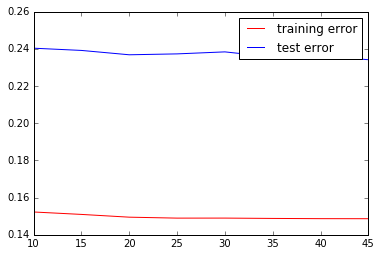

In [19]:
import matplotlib.pyplot as pl
pl.plot(tree_number, train_error2, c = 'red', label = 'training error')
pl.plot(tree_number, test_error2, c = 'blue', label = 'test error')

pl.legend()
pl.show()

0.99999932734728203